In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
dataset = datasets.load_breast_cancer()
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 0)

In [4]:
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [5]:
clf.score(X_test, Y_test)

0.9385964912280702

### Using Feature Scaling

In [6]:
from sklearn import preprocessing

In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.956140350877193

## Cross Validation

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [10]:
iris = datasets.load_iris()
xtrain , xtest , ytrain , ytest = train_test_split(iris.data , iris.target , test_size = 0.2)

In [11]:
clf = LinearRegression()
cross_val_score(clf, xtrain, ytrain)
# By default value of K is 5 for Cross Validation

array([0.86477989, 0.95335564, 0.94322928, 0.86359253, 0.95600634])

In [12]:
clf = LinearRegression()
cross_val_score(clf, iris.data, iris.target)
#Because data is in sorted order initials start from class 0 , then 1, then 2.

array([0.        , 0.85124923, 0.        , 0.76155439, 0.        ])

In [13]:
clf = LinearRegression()
cross_val_score(clf, iris.data, iris.target, cv = KFold(3, True, 0 ))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.90322728, 0.92527008, 0.94214064])

## Finding Optimal K

In [27]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
iris = datasets.load_breast_cancer()
xtrain , xtest , ytrain , ytest = train_test_split(iris.data , iris.target , test_size = 0.2)
clf = KNeighborsClassifier()

In [28]:
clf.fit(xtrain, ytrain)

KNeighborsClassifier()

In [29]:
clf.score(xtest,ytest)

0.9473684210526315

In [30]:
x_axis = []
y_axis = []
for i in range (1,26,2):   #odd numbers from 1 to 25
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf,xtrain,ytrain)
    print(i , score.mean())
    x_axis.append(i)
    y_axis.append(score.mean())

1 0.9076923076923077
3 0.9252747252747252
5 0.9296703296703296
7 0.9318681318681318
9 0.9340659340659341
11 0.923076923076923
13 0.9296703296703297
15 0.9296703296703297
17 0.9230769230769231
19 0.9230769230769231
21 0.9230769230769231
23 0.9208791208791209
25 0.9186813186813187


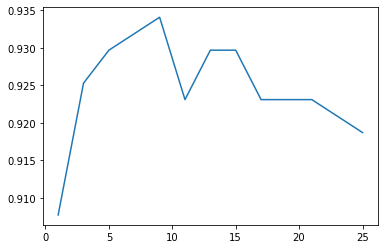

In [31]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.show()

#### 9 is the best value